In [18]:
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_csv('/Users/luwei/Desktop/MMAI/data sicence /kc_house_data.csv')

In [20]:
df.info()
#No missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
pip install scikit-learn  

Note: you may need to restart the kernel to use updated packages.


In [23]:
#feature engineering 
import numpy as np

In [24]:
df['waterfront'].unique()

array([0, 1])

In [25]:
df['view'].unique()

array([0, 3, 4, 2, 1])

In [26]:
df['condition'].unique()

array([3, 5, 4, 1, 2])

In [27]:
#Transform date into a datetime data format 

In [28]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [15]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


In [29]:
df['month'] = df['date'].dt.month

In [30]:
df['day'] = df['date'].dt.day

In [31]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [34]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


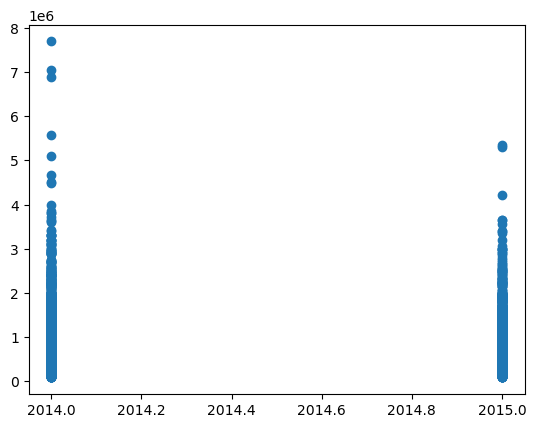

In [36]:
plt.scatter(df['year'],df['price'])

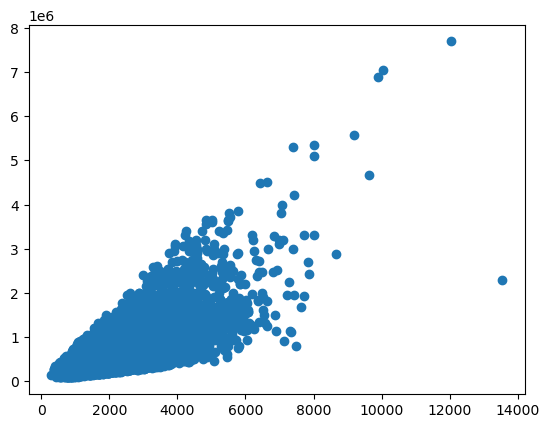

In [37]:
plt.scatter(df['sqft_living'],df['price'])

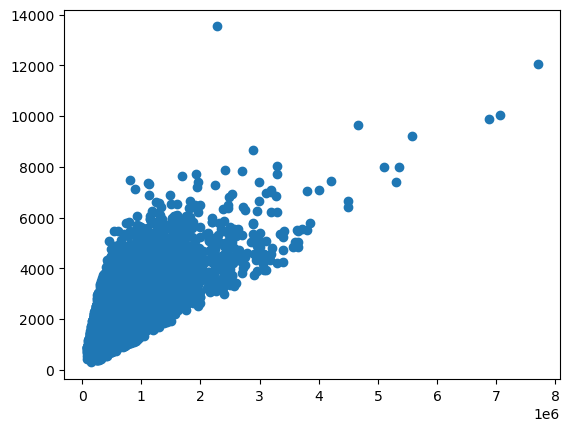

In [38]:
plt.scatter(df['price'],df['sqft_living'])

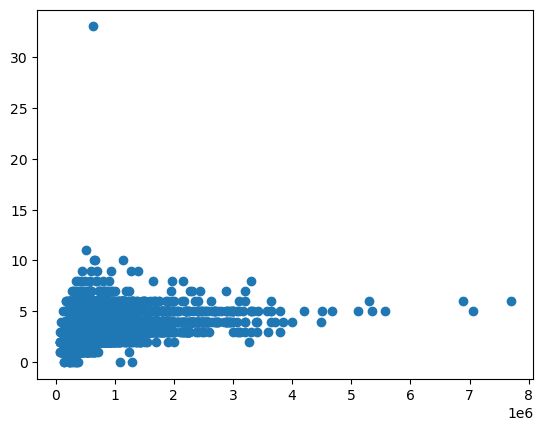

In [39]:
plt.scatter(df['price'],df['bedrooms'])

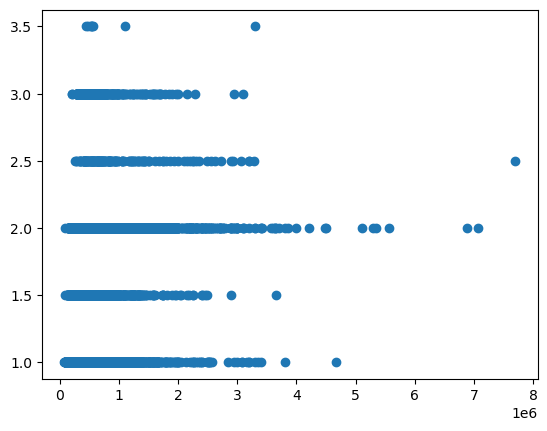

In [41]:
plt.scatter(df['price'],df['floors'])

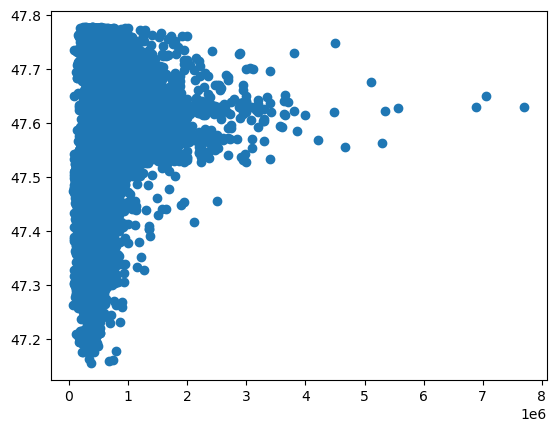

In [42]:
plt.scatter(df['price'],df['lat'])

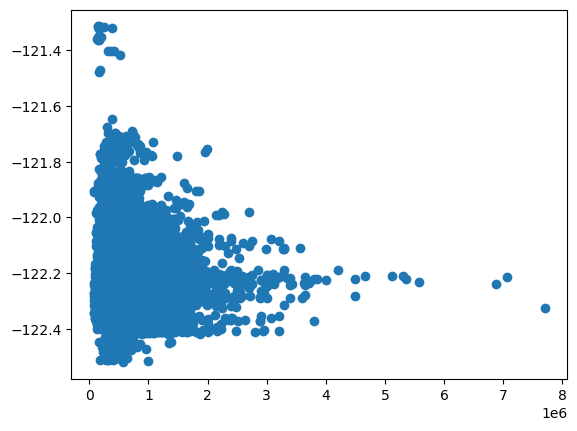

In [43]:
plt.scatter(df['price'],df['long'])

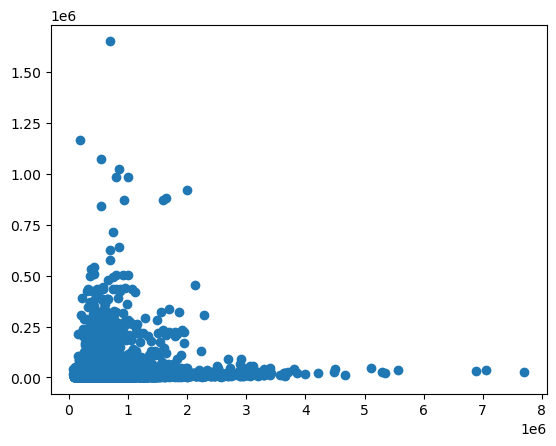

In [44]:
plt.scatter(df['price'],df['sqft_lot'])

In [45]:
results = ols("price ~ year + sqft_living + sqft_lot", data=df).fit()

In [46]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     7046.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:36:52   Log-Likelihood:            -3.0023e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21609   BIC:                         6.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.852e+07   7.65e+06     -5.033      

In [47]:
"y_hat = -3.852e+07 + 1.91e+04year + 283.1793sqft_living - 0.2917sqft_lot"

'y_hat = -3.852e+07 + 1.91e+04year + 283.1793sqft_living - 0.2917sqft_lot'

In [48]:
-3.852e+07 + (1.91e+04) *2014 + 283.1793 * 1340 - 0.2917 * 5650

325212.157

In [50]:
results = ols("price ~ year + sqft_living + sqft_above", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     7028.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:48:55   Log-Likelihood:            -3.0025e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21609   BIC:                         6.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.808e+07   7.66e+06     -4.973      

In [52]:
results = ols("price ~ floors + sqft_living + sqft_above", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     7024.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:49:24   Log-Likelihood:            -3.0025e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21609   BIC:                         6.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.785e+04   5911.484     -9.787      

In [53]:
results = ols("price ~ floors + sqft_living + condition", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     7197.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:50:09   Log-Likelihood:            -3.0012e+05
No. Observations:               21613   AIC:                         6.002e+05
Df Residuals:                   21609   BIC:                         6.003e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.373e+05   1.23e+04    -19.345      

In [54]:
results = ols("price ~ bedrooms + sqft_living + condition", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     7629.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:50:45   Log-Likelihood:            -2.9980e+05
No. Observations:               21613   AIC:                         5.996e+05
Df Residuals:                   21609   BIC:                         5.996e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.603e+04   1.11e+04     -7.718      

In [56]:
results = ols("price ~ bedrooms + bathrooms + condition", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     2905.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:51:55   Log-Likelihood:            -3.0394e+05
No. Observations:               21613   AIC:                         6.079e+05
Df Residuals:                   21609   BIC:                         6.079e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.253e+05    1.4e+04    -16.094      0.0

In [57]:
results = ols("price ~ lat + sqft_living + condition", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     9649.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:52:39   Log-Likelihood:            -2.9842e+05
No. Observations:               21613   AIC:                         5.968e+05
Df Residuals:                   21609   BIC:                         5.969e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.445e+07   5.61e+05    -61.376      

In [59]:
results = ols("price ~ lat + year +long", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     786.9
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:53:19   Log-Likelihood:            -3.0648e+05
No. Observations:               21613   AIC:                         6.130e+05
Df Residuals:                   21609   BIC:                         6.130e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.899e+07   1.05e+07     -3.729      0.0

In [61]:
results = ols("price ~ lat + grade +long", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     7357.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:53:58   Log-Likelihood:            -3.0000e+05
No. Observations:               21613   AIC:                         6.000e+05
Df Residuals:                   21609   BIC:                         6.000e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.405e+07    1.6e+06    -33.819      0.0

In [62]:
results = ols("price ~ lat +long", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     1178.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:54:17   Log-Likelihood:            -3.0649e+05
No. Observations:               21613   AIC:                         6.130e+05
Df Residuals:                   21610   BIC:                         6.130e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.872e+07   2.13e+06     -8.800      0.0

In [64]:
results = ols("price ~ year", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2764
Date:                Mon, 10 Jul 2023   Prob (F-statistic):              0.599
Time:                        16:54:40   Log-Likelihood:            -3.0760e+05
No. Observations:               21613   AIC:                         6.152e+05
Df Residuals:                   21611   BIC:                         6.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.115e+06   1.08e+07     -0.476      0.6

In [58]:
results = ols("price ~ lat + sqft_living +long", data=df).fit()
print(results.summary())
#hightest R-squared value

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     9884.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:52:56   Log-Likelihood:            -2.9827e+05
No. Observations:               21613   AIC:                         5.965e+05
Df Residuals:                   21609   BIC:                         5.966e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.902e+07   1.49e+06    -46.330      

In [65]:
"y_hat =  -6.902e+07 + (6.72e+05)lat + 286.4517sqft_living + (-3.028e+05)long"

'y_hat =  -6.902e+07 + (6.72e+05)lat + 286.4517sqft_living + (-3.028e+05)long'

In [66]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
